In [1]:
%pylab inline  
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

%matplotlib inline
sns.set()


Populating the interactive namespace from numpy and matplotlib


Задание 2

In [2]:
df = pd.read_csv('factbook.csv')
dataframe  = df.copy()

Выкинем строки с пропусками в основных параметрах

In [3]:
dataframe = dataframe[pd.notnull(dataframe['GDP']) & pd.notnull(dataframe['Unemployment rate(%)'])
                     &pd.notnull(dataframe['Death rate(deaths/1000 population)']) & pd.notnull(dataframe['Debt - external'])
                     &pd.notnull(dataframe['Area(sq km)']) &pd.notnull(dataframe['Population']) &
                     pd.notnull(dataframe['Exports'])&pd.notnull(dataframe['Birth rate(births/1000 population)'])
                     &pd.notnull(dataframe['Electricity - consumption(kWh)'])&pd.notnull(dataframe['Electricity - production(kWh)'])
                     &pd.notnull(dataframe['Reserves of foreign exchange & gold'])
                     &pd.notnull(dataframe['Industrial production growth rate(%)'])
                     &pd.notnull(dataframe['Military expenditures - dollar figure'])]
dataframe = dataframe.drop(['Public debt(% of GDP)', 'Railways(km)', 'Oil - proved reserves(bbl)', 'Current account balance'
                           ,'Oil - exports(bbl/day)','Oil - imports(bbl/day)','Natural gas - production(cu m)',
                           'Natural gas - proved reserves(cu m)',
                           'Natural gas - exports(cu m)',
                           'Natural gas - imports(cu m)',
                           'Natural gas - consumption(cu m)',
                           'Internet hosts',
                           'Military expenditures - percent of GDP(%)',
                           'Investment (gross fixed)(% of GDP)',
                           'Labor force','HIV/AIDS - adult prevalence rate(%)','HIV/AIDS - deaths',
                            'HIV/AIDS - people living with HIV/AIDS'], axis=1)
dataframe = dataframe.iloc[1:] #Выкидываем первую строчку с типами переменных
dataframe = dataframe.reset_index(drop=True)

regs = pd.read_csv('reg.csv')
regs.columns = ['Country', 'Region']
regions = []
for country in dataframe.Country:
    c = regs[regs['Country'].str.contains(country)].Country
    region = regs[regs['Country'].str.contains(country)].Region
    try:
        regions.append(region.describe().top)
    except:
        regions.append("Unknown")
        pass
dataframe["Region"] = regions

dataframe = dataframe[~dataframe.Region.str.contains("Unknown")]
dataframe = dataframe.reset_index()
dataframe


,index,Country,Area(sq km),Birth rate(births/1000 population),Death rate(deaths/1000 population),Debt - external,Electricity - consumption(kWh),Electricity - production(kWh),Exports,GDP,...,Military expenditures - dollar figure,Oil - consumption(bbl/day),Oil - production(bbl/day),Population,Reserves of foreign exchange & gold,Telephones - main lines in use,Telephones - mobile cellular,Total fertility rate(children born/woman),Unemployment rate(%),Region
0,0,Albania,28748,15.08,5.12,1410000000,6760000000,5680000000,552400000,17460000000,...,56500000,7500,2000,3563112,1206000000,255000,1100000,2.04,14.80,EASTERN EUROPE
1,1,Algeria,2381740,17.13,4.60,21900000000,23610000000,25760000000,32160000000,212300000000,...,2480000000,209000,1200000,32531853,43550000000,2199600,1447310,1.92,25.40,NORTHERN AFRICA
2,2,Argentina,2766890,16.90,7.56,157700000000,81650000000,81390000000,33780000000,483500000000,...,4300000000,486000,755000,39537943,19470000000,8009400,6500000,2.19,14.80,LATIN AMER. & CARIB
3,3,Armenia,29800,11.76,8.16,905000000,5797000000,6492000000,850000000,13650000000,...,135000000,5700,0,2982904,555000000,562600,114400,1.32,30.00,C.W. OF IND. STATES
4,4,Australia,7686850,12.26,7.44,308700000000,195600000000,210300000000,86890000000,611700000000,...,1665000000,796500,537500,20090437,35140000000,10815000,14347000,1.76,5.10,OCEANIA
5,5,Austria,83870,8.81,9.70,15500000000,55090000000,58490000000,102700000000,255900000000,...,1497000000,262400,20670,8184691,12730000000,3881000,7094500,1.36,4.40,WESTERN EUROPE
6,6,Azerbaijan,86600,20.40,9.86,1832000000,17370000000,17550000000,3168000000,30010000000,...,121000000,140000,312800,7911974,875000000,923800,870000,2.44,1.20,C.W. OF IND. STATES
7,7,Bahrain,665,18.10,4.08,6215000000,6379000000,6860000000,8205000000,13010000000,...,628900000,40000,44000,688345,2141000000,185800,443100,2.63,15.00,NEAR EAST
8,8,Bangladesh,144000,30.01,8.40,19970000000,15300000000,16450000000,7478000000,275700000000,...,995300000,71000,3581,144319628,3000000000,740000,1365000,3.13,40.00,ASIA (EX. NEAR EAST)
9,9,Belarus,207600,10.83,14.15,600000000,34300000000,30000000000,11470000000,70500000000,...,176100000,285000,36000,10300483,770200000,3071300,1118000,1.39,2.00,C.W. OF IND. STATES


Преобразуем типы переменных от строковых к численным

In [4]:
dataframe["Unemployment rate(%)"] = pd.to_numeric(dataframe["Unemployment rate(%)"])
dataframe["Area(sq km)"] = pd.to_numeric(dataframe["Area(sq km)"])
dataframe["Death rate(deaths/1000 population)"] = pd.to_numeric(dataframe["Death rate(deaths/1000 population)"])
dataframe["Birth rate(births/1000 population)"] = pd.to_numeric(dataframe["Birth rate(births/1000 population)"])
dataframe["Debt - external"] = pd.to_numeric(dataframe["Debt - external"])
dataframe["GDP - per capita"] = pd.to_numeric(dataframe["GDP - per capita"])
dataframe["Exports"] = pd.to_numeric(dataframe["Exports"])
dataframe["Population"] = pd.to_numeric(dataframe["Population"])
dataframe["Life expectancy at birth(years)"] = pd.to_numeric(dataframe["Life expectancy at birth(years)"])

Создадим новый датафрейм, в который вставим столбцы с выбранными признаками, нормализуем их и применим K-means, сначала для 5 признаков, а потом для 9

         Country
Cluster         
0             68
1              7
2              4
3              9
4             19
                                                   Country
Cluster                                                   
0        AlbaniaArgentinaAustraliaAustriaBahrainBelgium...
1        BotswanaCameroonKenyaLesothoMozambiqueSouth Af...
2                        SenegalTurkmenistanZambiaZimbabwe
3        AlgeriaArmeniaBangladeshEquatorial GuineaHondu...
4        AzerbaijanBelarusBelizeBoliviaCambodiaCote d'I...


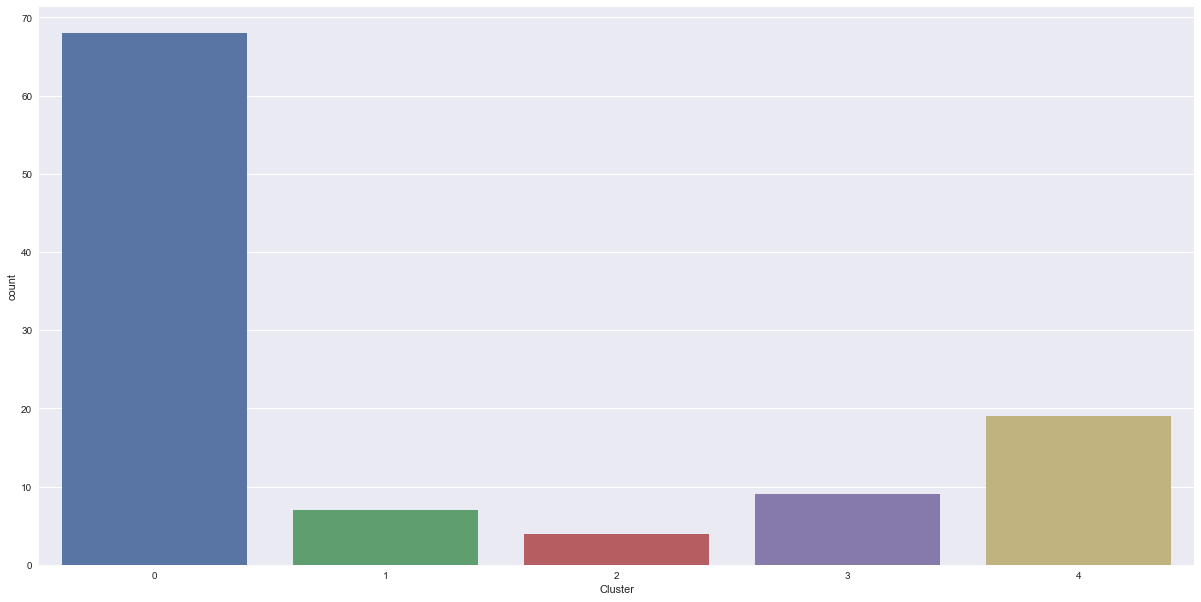

In [5]:
test_frame = pd.DataFrame()
test_frame['Death rate'] = dataframe["Death rate(deaths/1000 population)"]
test_frame['Unemployment rate'] = dataframe["Unemployment rate(%)"]
test_frame['Exports'] = dataframe["Exports"]
test_frame['Debt external'] = dataframe["Debt - external"]
test_frame['GDP - per capita'] = dataframe["GDP - per capita"]
test_frame['Population'] = dataframe["Population"]
test_frame['Area'] = dataframe["Area(sq km)"]
test_frame['Life expectancy at birth(years)'] = dataframe['Life expectancy at birth(years)']
test_frame['Country'] = dataframe["Country"]
test_frame.set_index("Country", inplace = True) 

test_frame["Exports"]=(test_frame["Exports"]-test_frame["Exports"].mean())/test_frame["Exports"].std()
test_frame["Population"]=(test_frame["Population"]-test_frame["Population"].mean())/test_frame["Population"].std()
test_frame["Area"]=(test_frame["Area"]-test_frame["Area"].mean())/test_frame["Area"].std()
test_frame["Debt external"]=(test_frame["Debt external"]-test_frame["Debt external"].mean())/test_frame["Debt external"].std()
test_frame["GDP - per capita"]=(test_frame["GDP - per capita"]-test_frame["GDP - per capita"].mean())/test_frame["GDP - per capita"].std()

dataset_array = test_frame.values

km = KMeans(n_clusters=5,n_init=10)
km.fit(dataset_array)

labels = km.labels_

results = pd.DataFrame([test_frame.index,labels]).T
results.columns = ['Country', 'Cluster']


clusters = results.groupby(['Cluster'])
print(clusters.count())
print(clusters.sum())
sns.set(rc={'figure.figsize':(20.7,10.27)})
ax = sns.countplot(x="Cluster",data=results)

         Country
Cluster         
0             35
1              6
2              5
3              6
4              5
5              1
6             35
7              2
8             12
                                                   Country
Cluster                                                   
0        AlbaniaArgentinaBahrainBelgiumBelizeBrazilBulg...
1        BangladeshKenyaSenegalTajikistanTurkmenistanYemen
2          BotswanaCameroonMozambiqueSouth AfricaSwaziland
3         AlgeriaArmeniaHondurasMacedoniaSaudi ArabiaSyria
4            Cote d'IvoireEquatorial GuineaGabonGhanaSudan
5                                                 Zimbabwe
6        AustraliaAustriaCanadaChileCosta RicaCubaCypru...
7                                            LesothoZambia
8        AzerbaijanBelarusBoliviaCambodiaGuatemalaIndia...


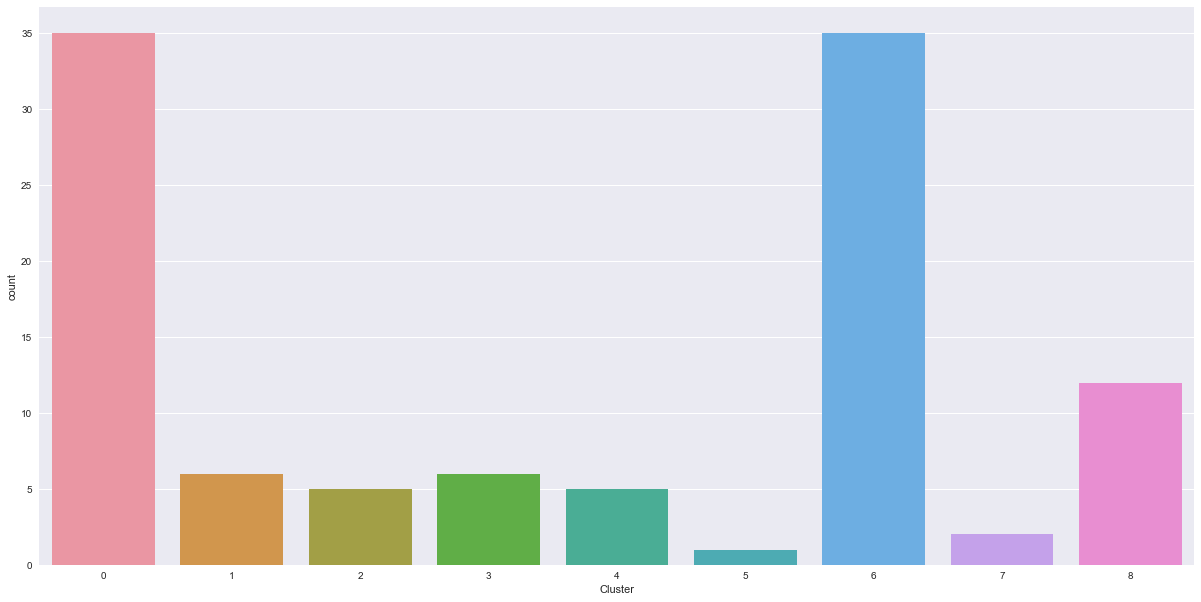

In [6]:
km = KMeans(n_clusters=9,n_init=10)
km.fit(dataset_array)

labels = km.labels_

results = pd.DataFrame([test_frame.index,labels]).T
results.columns = ['Country', 'Cluster']


clusters = results.groupby(['Cluster'])
print(clusters.count())
print(clusters.sum())
sns.set(rc={'figure.figsize':(20.7,10.27)})
ax = sns.countplot(x="Cluster",data=results)

#print(results[results.Cluster==0])
#print(results[results.Cluster==1])
#print(results[results.Cluster==2])
#print(results[results.Cluster==3])
#print(results[results.Cluster==4])
#print(results[results.Cluster==5])
#print(results[results.Cluster==6])
#print(results[results.Cluster==7])
#print(results[results.Cluster==8])

Найдем среднее в каждом кластере и построим 95% доверительный интервал по признаку Death rate на всем множестве объектов, используя бутстрэп

In [21]:
cluster0 = results[results['Cluster']==0]
cluster1 = results[results['Cluster']==3]
N=90
L = 5
statistics = []
for i in range(N):
    df = cluster0.sample(n=L)
    s = 0
    for x in df.Country:
        value = dataframe[dataframe['Country'].str.contains(x)]['Life expectancy at birth(years)']
        s += float(value)
    statistics.append(s/L)
mb = np.mean(statistics)
print("Первый кластер:")
print("Среднее - ",mb)

Первый кластер:
Среднее -  72.8592888888889


In [22]:
statistics = []
for i in range(N):
    df = cluster1.sample(n=L)
    s = 0
    for x in df.Country:
        value = dataframe[dataframe['Country'].str.contains(x)]['Life expectancy at birth(years)']
        s += float(value)
    statistics.append(s/L)
mb = np.mean(statistics)
print("Второй кластер:")
print("Среднее - ",mb)

Второй кластер:
Среднее -  71.46691111111112


In [23]:
statistics = []
for i in range(N):
    df = dataframe.sample(n=L)
    s = 0
    for x in df.Country:
        value = dataframe[dataframe['Country'].str.contains(x)]['Life expectancy at birth(years)']
        s += float(value)
    statistics.append(s/L)
mb = np.mean(statistics)
sb = np.std(statistics)
lower = mb - sb*1.96
upper = mb + sb*1.96
print("На всем множестве")
print("Среднее - ",mb)
print("Доверительный интервал (с опорой)- [",lower,",",upper,"]")

statistics = np.sort(statistics)
alpha = 0.95
N0 = int(N*((1-alpha)/2))
N1 = int(N*((1+alpha)/2))
lower = statistics[N0+1]
upper = statistics[N1]
print("Доверительный интервал (без опоры)- [",lower,",",upper,"]")

На всем множестве
Среднее -  69.2204888888889
Доверительный интервал (с опорой)- [ 59.48144479775066 , 78.95953298002713 ]
Доверительный интервал (без опоры)- [ 58.017999999999994 , 77.202 ]


Задание 4

Возьмем 3 признака - уровень рождаемости, уровень смертности и ожидаемая продолжительность жизни. Визуализируем их по регионам страны

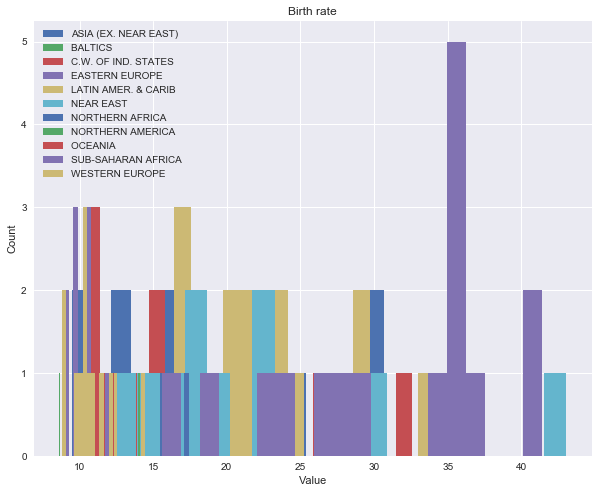

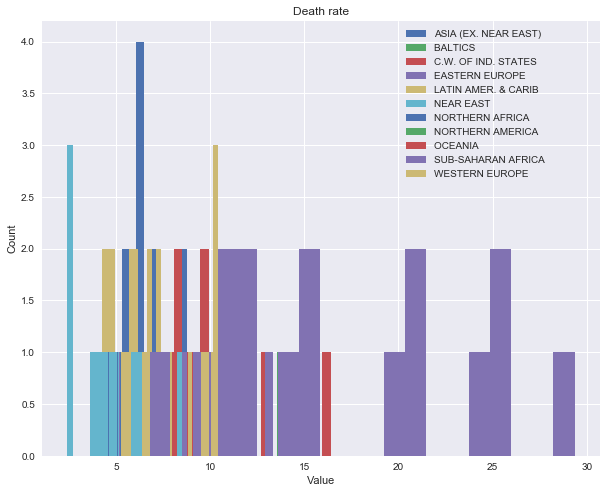

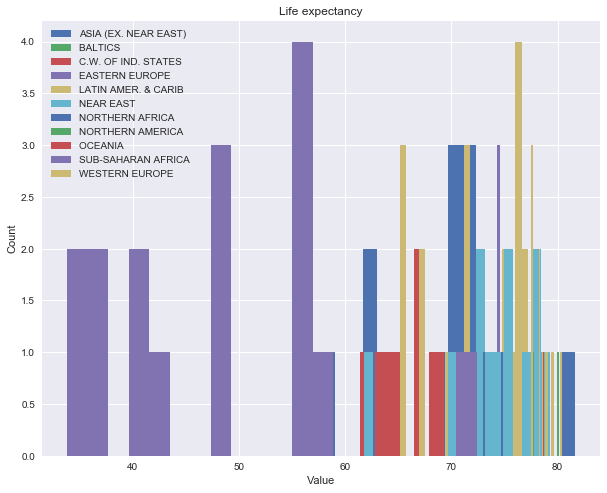

In [24]:
from sklearn.preprocessing import StandardScaler
test_frame = pd.DataFrame()
test_frame['Death rate'] = pd.to_numeric(dataframe["Death rate(deaths/1000 population)"])
test_frame['Birth rate'] = pd.to_numeric(dataframe["Birth rate(births/1000 population)"])
test_frame['Life expectancy'] = pd.to_numeric(dataframe['Life expectancy at birth(years)'])
test_frame['Region'] = dataframe["Region"]
targets = \
['ASIA (EX. NEAR EAST)         ',
 'BALTICS                            ',
 'C.W. OF IND. STATES ',
 'EASTERN EUROPE                     ',
 'LATIN AMER. & CARIB    ',
 'NEAR EAST                          ',
 'NORTHERN AFRICA                    ',
 'NORTHERN AMERICA                   ',
 'OCEANIA                            ',
 'SUB-SAHARAN AFRICA                 ',
 'WESTERN EUROPE                     ']


fig = plt.figure(figsize = (10,8))
n_bins = 20
for reg in targets:
    r = test_frame[test_frame.Region==reg]
    plt.hist(r["Birth rate"], bins=n_bins)
plt.legend(targets)
plt.title('Birth rate')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

fig = plt.figure(figsize = (10,8))
n_bins = 20
for reg in targets:
    r = test_frame[test_frame.Region==reg]
    plt.hist(r["Death rate"], bins=n_bins)
plt.legend(targets)
plt.title('Death rate')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

fig = plt.figure(figsize = (10,8))
n_bins = 20
for reg in targets:
    r = test_frame[test_frame.Region==reg]
    plt.hist(r["Life expectancy"], bins=n_bins)
plt.legend(targets)
plt.title('Life expectancy')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()



Нормализуем данные по размаху и нарисуем гистограмму

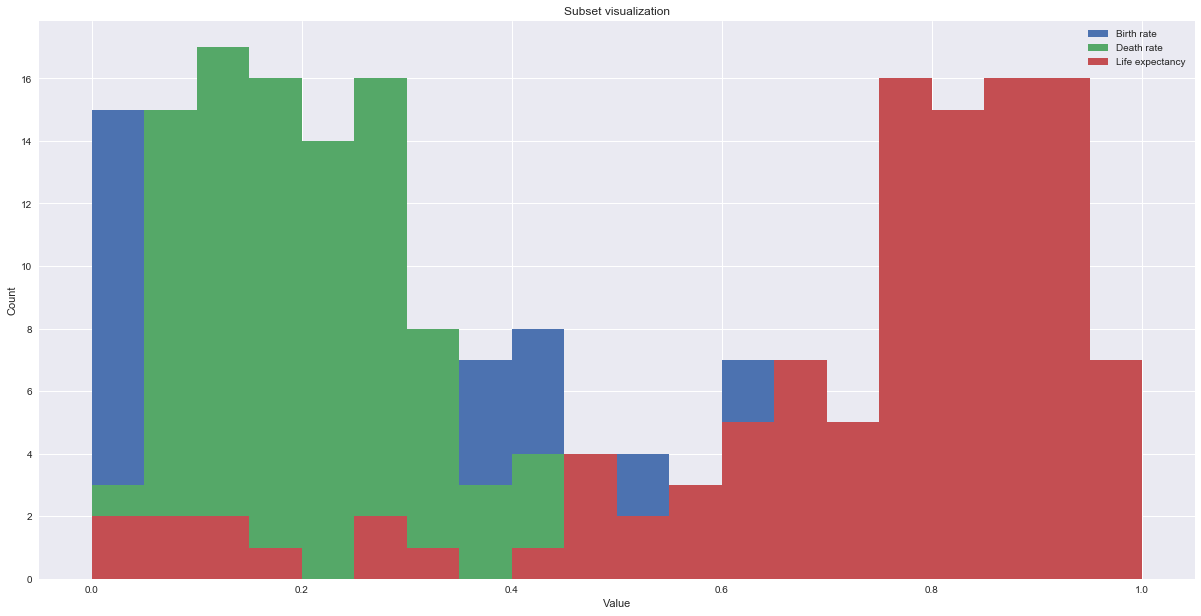

In [25]:
test_frame['Death rate'] = (test_frame['Death rate'] - test_frame['Death rate'].min()) /  \
(test_frame['Death rate'].max() - test_frame['Death rate'].min())

test_frame['Birth rate'] = (test_frame['Birth rate'] - test_frame['Birth rate'].min()) /  \
(test_frame['Birth rate'].max() - test_frame['Birth rate'].min())

test_frame['Life expectancy'] = (test_frame['Life expectancy'] - test_frame['Life expectancy'].min()) /  \
(test_frame['Life expectancy'].max() - test_frame['Life expectancy'].min())

n_bins = 20
plt.hist(test_frame['Birth rate'], bins=n_bins)
plt.hist(test_frame['Death rate'], bins=n_bins)
plt.hist(test_frame['Life expectancy'], bins=n_bins)
plt.xlabel('Value')
plt.ylabel('Count')
plt.legend(['Birth rate','Death rate','Life expectancy',])
plt.title('Subset visualization')
plt.show()

Теперь нормализуем данные по среднему

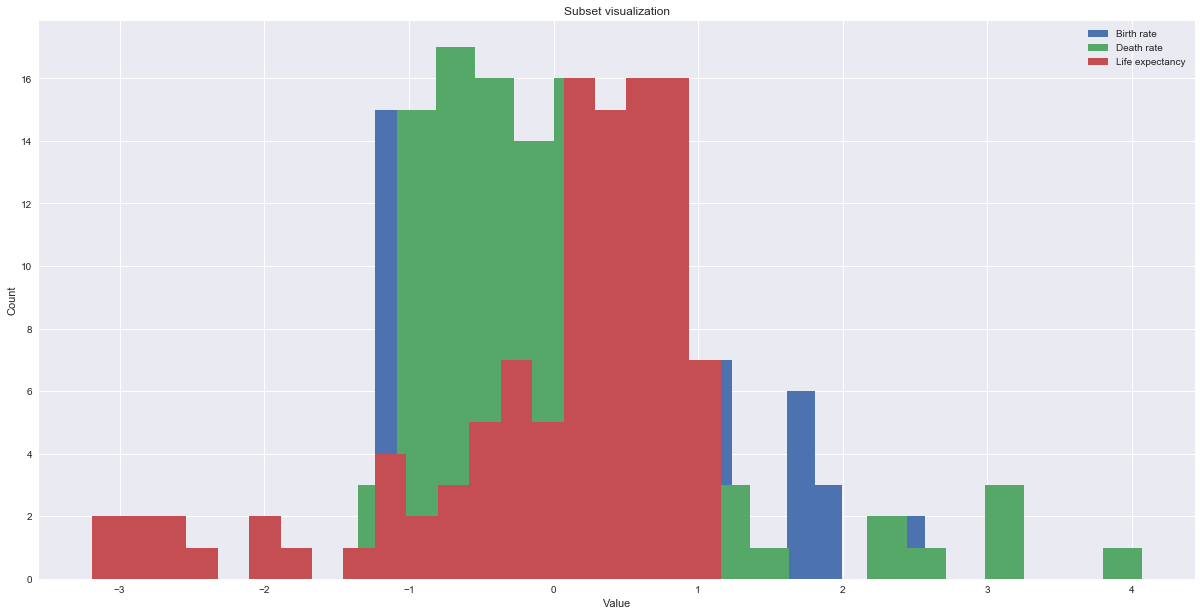

In [26]:
test_frame = pd.DataFrame()
test_frame['Death rate'] = pd.to_numeric(dataframe["Death rate(deaths/1000 population)"])
test_frame['Birth rate'] = pd.to_numeric(dataframe["Birth rate(births/1000 population)"])
test_frame['Life expectancy'] = pd.to_numeric(dataframe['Life expectancy at birth(years)'])
test_frame['Region'] = dataframe["Region"]



test_frame["Death rate"]=(test_frame["Death rate"]-test_frame["Death rate"].mean()) / test_frame["Death rate"].std()
test_frame["Birth rate"]=(test_frame["Birth rate"]-test_frame["Birth rate"].mean()) / test_frame["Birth rate"].std()
test_frame["Life expectancy"]=(test_frame["Life expectancy"]-\
test_frame["Life expectancy"].mean())/test_frame["Life expectancy"].std()

n_bins = 20
plt.hist(test_frame['Birth rate'], bins=n_bins)
plt.hist(test_frame['Death rate'], bins=n_bins)
plt.hist(test_frame['Life expectancy'], bins=n_bins)
plt.xlabel('Value')
plt.ylabel('Count')
plt.legend(['Birth rate','Death rate','Life expectancy',])
plt.title('Subset visualization')
plt.show()

Применим PCA

In [27]:
from sklearn.decomposition import PCA
test_frame = pd.DataFrame()
test_frame['Death rate'] = pd.to_numeric(dataframe["Death rate(deaths/1000 population)"])
test_frame['Birth rate'] = pd.to_numeric(dataframe["Birth rate(births/1000 population)"])
test_frame['Life expectancy'] = pd.to_numeric(dataframe['Life expectancy at birth(years)'])
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(test_frame)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, dataframe[['Region']]], axis = 1)

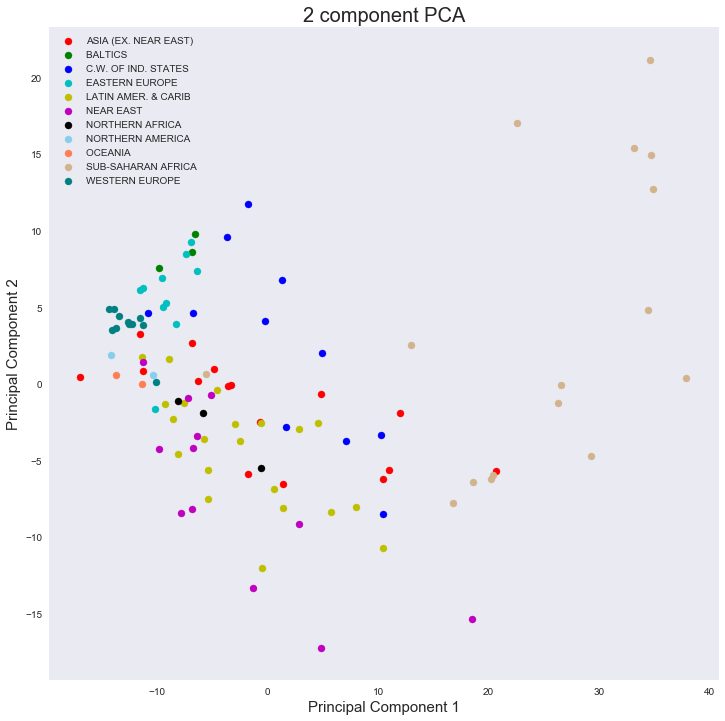

In [28]:
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = \
['ASIA (EX. NEAR EAST)         ',
 'BALTICS                            ',
 'C.W. OF IND. STATES ',
 'EASTERN EUROPE                     ',
 'LATIN AMER. & CARIB    ',
 'NEAR EAST                          ',
 'NORTHERN AFRICA                    ',
 'NORTHERN AMERICA                   ',
 'OCEANIA                            ',
 'SUB-SAHARAN AFRICA                 ',
 'WESTERN EUROPE                     ']

colors = ['r', 'g', 'b','c','y','m','k','skyblue','coral','tan','teal']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Region'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

Как можно заметить, визуализация PCA отличается от визуализации нормализованных данных. Лучше в данном случае подходит нормализация по среднему,
так как она меньше отличается от PCA.